# Zadanie nr 7

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

### Zadanie 1

In [2]:
def newton_raphson(f, a, b, precyzja=10**(-6), wykres=True):
    """
    Znajduje przybliżone miejsce zerowe funkcji f
    za pomocą metody Newtona-Raphsona
    
    Parametry:
        f - funkcja, dla której szukamy rozwiązania
        a - początek przedziału, w którym ma być znalezione rozwiązanie
        b - koniec przedziału, w którym ma być znalezione rozwiązanie
        precyzja - akceptowalna różnica między aktualnym,
                   a następnym przybliżeniem (domyślnie 10^-6)
        wykres - czy wykres ma zostać wygenerowany? (domyślnie Prawda)
    
    Zwraca:
        przybliżenie miejsca zerowego funkcji f
        jeśli nie znaleziono rozwiązania w ciągu 1000 iteracji
        lub wartość funkcji na granicach przedziału nie jest różnych
        znaków to zwróci None
    """
    if f(a) * f(b) > 0:
        print('Funkcja musi mieć różne znaki na krańcach przedziału.')
        return None
    derivative = lambda x: (f(x + 0.0000001) - f(x)) / 0.0000001

    if wykres:
        X = np.linspace(a, b, 100)
        plt.plot(X, np.vectorize(f)(X), color='black', label=f'$f(x)$')
        plt.axhline(0, linestyle='--', color='grey')
        plt.xlim(a, b)
        colors = ('orange', 'red', 'green')
        for i in range(1000):
            next_a = a - f(a) / derivative(a)
            if abs(a - next_a) > precyzja:
                if i < 3:
                    plt.plot((a, next_a), (f(a), 0),
                             color=colors[i], label=f'$k={i + 1}$')
                    plt.plot((next_a, next_a), (0, f(next_a)),
                             linestyle='--', color=colors[i], marker='o')
                    plt.scatter(next_a, 0, color=colors[i])
                    plt.annotate(f'$x_{i + 1}$', (next_a + 0.1, 0.1),
                                 color=colors[i])
                a = next_a
            else:
                plt.scatter(a, f(a), color='black')
                plt.annotate('$x_n$', (a + 0.1, f(a) - 0.1))
                plt.legend()
                plt.show()
                return a
        else:
            print('Przekroczono liczbę maksymalnych iteracji.')
    else:
        for _ in range(1000):
            next_a = a - f(a) / derivative(a)
            if abs(a - next_a) > precyzja:
                a = next_a
            else:
                return a
        print('Przekroczono liczbę maksymalnych iteracji.')

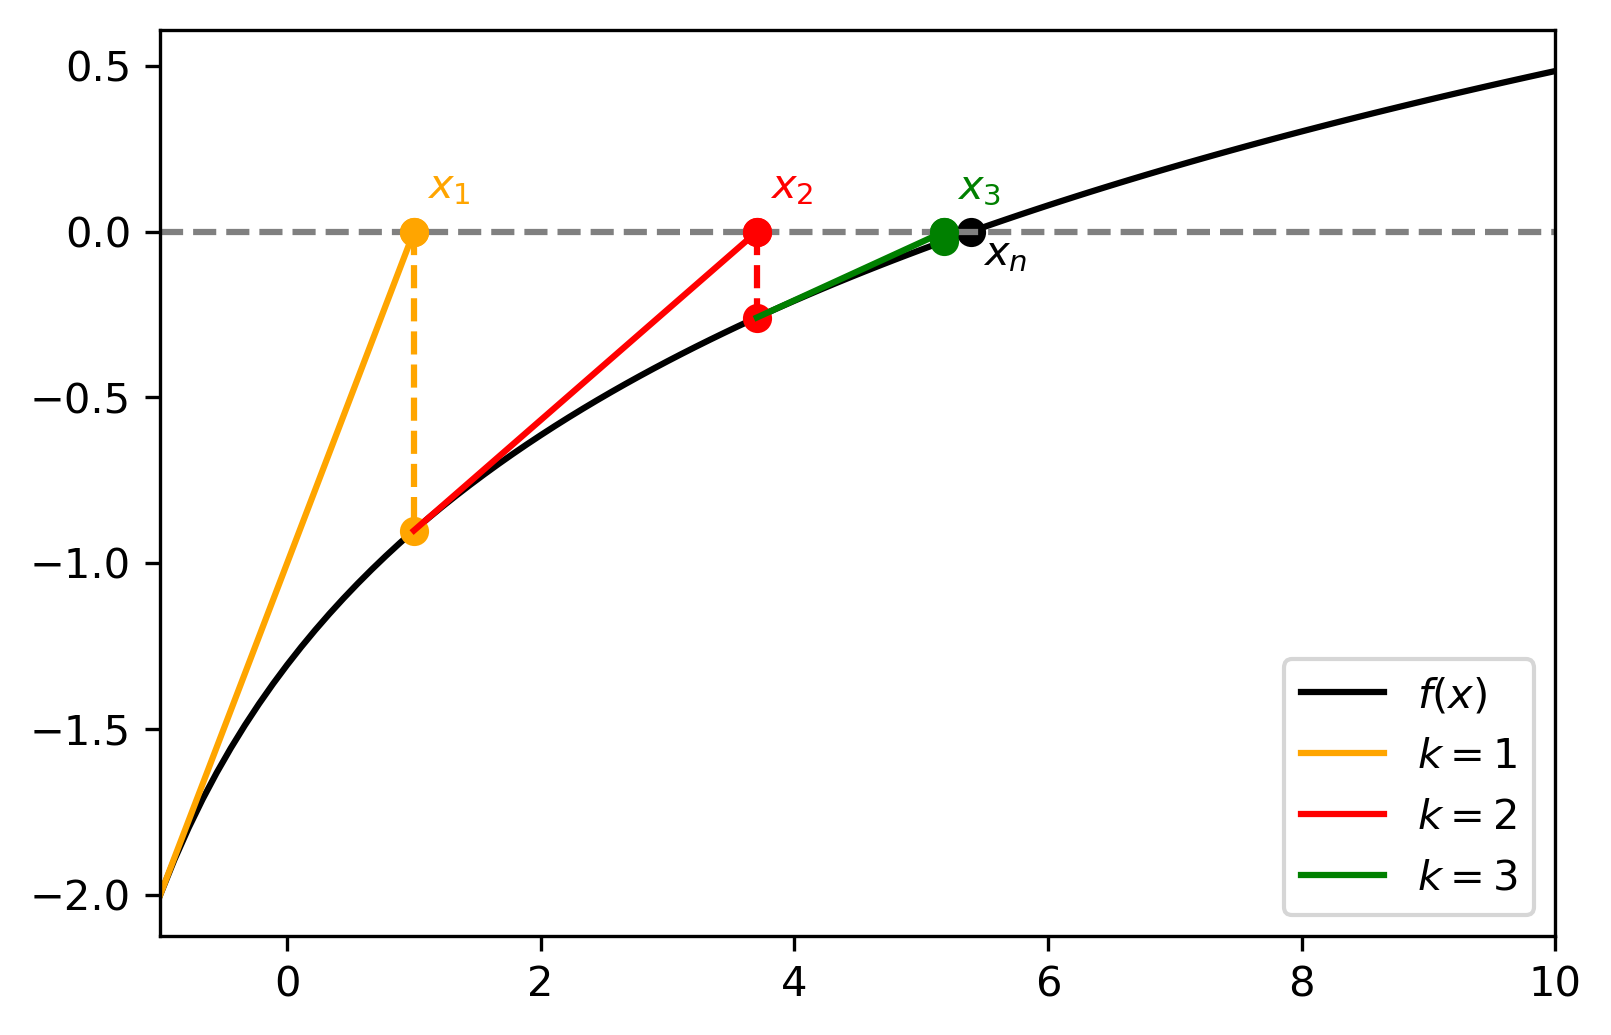

Przybliżone miejsce zerowe funkcji to x=5.389055500518735


In [3]:
print(f'Przybliżone miejsce zerowe funkcji to x={newton_raphson(lambda x: math.log(x+2)-2, -1, 10)}')

### Zadanie 2

In [4]:
def newton_vs_bisekcja(precyzja):
    """
    Porównuje algorytm Newtona-Raphsona oraz algorytm bisekcji
    na przykładzie funkcji e^x-2
    
    Paramtery:
        precyzja - dopuszczalne odchylenie od faktycznego
                   miejsca zerowego funkcji
    Zwraca:
        dwie liczby reprezentujące liczbę iteracji
        algorytmu newtona oraz bisekcji
    """
    f, a, b, precyzja = lambda x: math.exp(x) - 2, -1, 2, 2**(-precyzja)
    derivative = lambda x: (f(x + 0.0000001) - f(x)) / 0.0000001
    a_n, newton = a, 0
    for i in range(1000):
        next_a = a_n - f(a_n) / derivative(a_n)
        if abs(a_n - math.log(2)) > precyzja:
            a_n = next_a
        else:
            newton = i
            break
    i = 0
    c = (a + b) / 2
    half = (b - a) / 2
    if half <= precyzja:
        return newton, i
    f_a = f(a)
    while abs(c - math.log(2)) > precyzja:
        i += 1
        f_c = f(c)
        if f_a * f_c < 0:
            b = c
        elif f_a * f_c > 0:
            a = c
            f_a = f_c
        else:
            return newton, i
        half /= 2
        c = (a + b) / 2
    return newton, i

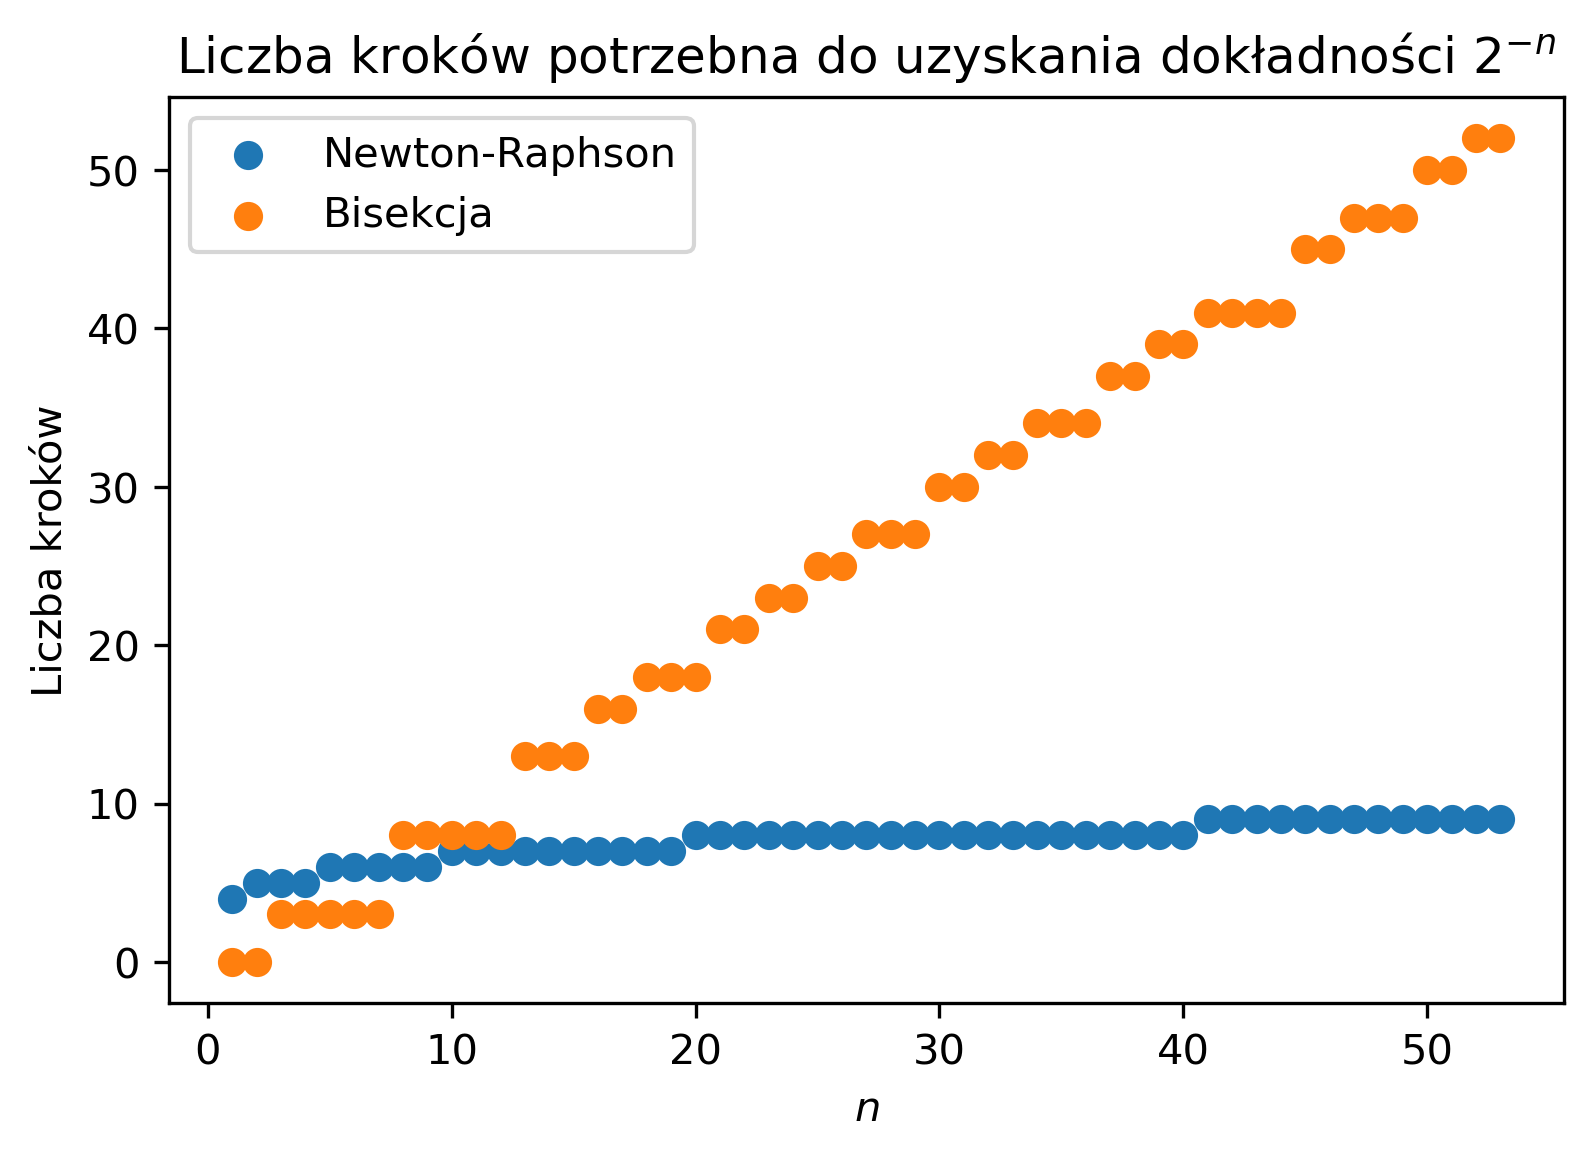

In [5]:
newtons, bisections = [], []
for n in range(1, 54):
    newton, bisection = newton_vs_bisekcja(n)
    newtons.append(newton)
    bisections.append(bisection)
plt.scatter(range(1, 54), newtons, label='Newton-Raphson')
plt.scatter(range(1, 54), bisections, label='Bisekcja')
plt.xlabel('$n$')
plt.ylabel('Liczba kroków')
plt.title('Liczba kroków potrzebna do uzyskania dokładności $2^{-n}$')
plt.legend()
plt.show()

### Komentarz

Metoda Newtona-Raphsona zwykle zbiega się bardzo szybko,\
jedynie dla małej dokładności metoda bisekcji jest wydajniejsza.\
Jednak wymaga również obliczenia wartości pochodnej danej funkcji.\
Jest to potencjalnie wadą, jeśli pochodna jest trudna do obliczenia.\
Ponadto podczas obliczania pochodnej może zdażyć się, że będzie ona równa zero.\
Zatem nie ma gwarancji, że metoda zbiega się z rozwiązaniem\
i powinniśmy ustawić maksymalną liczbę iteracji tak, aby implementacja\
zakończyła się, jeśli nie znajdziemy rozwiązania.

Najbardziej efektywną metodą byłoby jednak połączenie tych dwóch metod:\
rozpoczęcie szacowania za pomocą metody bisekcji (dla powyższej funkcji do $n \leq 7$)\
a następnie, użycie metody Newtona, aby uściślić oszacowanie.